In [61]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [62]:
# code for merge sort courtesy of https://www.programiz.com/dsa/merge-sort

def mergeSort(array):
    if len(array) > 1:

        #  r is the point where the array is divided into two subarrays
        r = len(array)//2
        L = array[:r]
        M = array[r:]

        # Sort the two halves
        mergeSort(L)
        mergeSort(M)

        i = j = k = 0

        # Until we reach either end of either L or M, pick larger among
        # elements L and M and place them in the correct position at A[p..r]
        while i < len(L) and j < len(M):
            if L[i] < M[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = M[j]
                j += 1
            k += 1

        # When we run out of elements in either L or M,
        # pick up the remaining elements and put in A[p..r]
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1

        while j < len(M):
            array[k] = M[j]
            j += 1
            k += 1

In [63]:
# code for insertion sort courtesy of https://www.programiz.com/dsa/insertion-sort

def insertionSort(array):

    for step in range(1, len(array)):
        key = array[step]
        j = step - 1
        
        # Compare key with each element on the left of it until an element smaller than it is found
        # For descending order, change key<array[j] to key>array[j].        
        while j >= 0 and key < array[j]:
            array[j + 1] = array[j]
            j = j - 1
        
        # Place key at after the element just smaller than it.
        array[j + 1] = key

In [64]:
def findCrossover(merg, inst):
    for i in range(len(merg)-1,-1,-1):
        if inst[i] > merg[i]:
            return i
    return -1

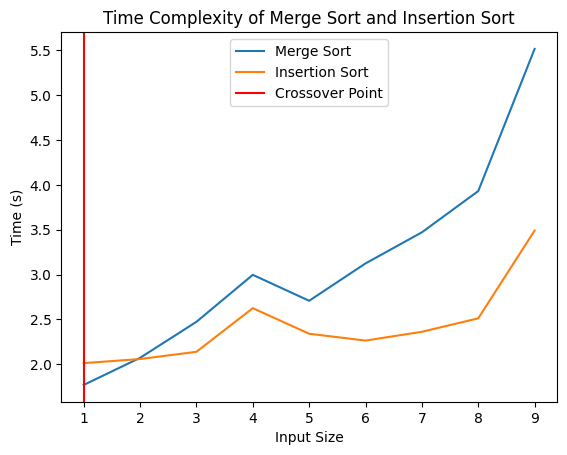

In [65]:
# Generate an array of n numbers
n = [j for j in range(1,10, 1)]

merge_time_output = []
insertion_time_output = []

def MERGESORT(i):
    array = np.random.randint(0, 2*i, size=i)
    mergeSort(array)

def INSERTIONSORT(i):
    array = np.random.randint(0, 2*i, size=i)
    insertionSort(array)

for i in n:
    # Test the time it takes to use merge sort on the array
    merge_sort_time = timeit.timeit(lambda: MERGESORT(i), number=100000)
    merge_time_output.append(merge_sort_time)

    array = np.random.randint(0, 2*i, size=i)
    # Test the time it takes to use insertion sort on the array
    insertion_sort_time = timeit.timeit(lambda: INSERTIONSORT(i), number=100000)
    insertion_time_output.append(insertion_sort_time)



# Plot the time it takes to use merge sort on the array
plt.plot(n, merge_time_output, label='Merge Sort')
# Plot the time it takes to use insertion sort on the array
plt.plot(n, insertion_time_output, label='Insertion Sort')

plt.axvline(n[findCrossover(merge_time_output, insertion_time_output)],color='red', label='Crossover Point')
plt.legend()
plt.xlabel('Input Size')
plt.ylabel('Time (s)')
plt.title('Time Complexity of Merge Sort and Insertion Sort')
plt.show()